In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
import os
import pickle

os.chdir(path)

In [3]:
model = pickle.load(open('data/finalized_model.sav', 'rb'))

In [4]:
model

RandomForestClassifier(random_state=42)

In [5]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.2 MB/s eta 0:00:00


In [6]:
import shap

In [7]:
df = pd.read_csv('data/sentiments_vector.csv')
loc = 0

def get_binary(x):
  if x>=0:
    return 0
  if x<0:
    return 1

df['return'] = df['return'].apply(get_binary)

sentiments = df.columns.tolist()
for i in ['title', 'return', 'volatility', 'ma_ck', 'Date', 'sum', 'session']:
  sentiments.remove(i)

X = df[sentiments]
y = df['return'].astype('int')

X_train = X
X_test = X
y_train = y
y_test = y

#Predict y value for test dataset
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]



In [8]:
model.predict_proba(X_test.loc[[421]])

array([[0.28333333, 0.71666667]])

In [ ]:
# explainer = shap.TreeExplainer(model, feature_perturbation='interventional', model_output='probability', feature_dependence='independent', data=X_test)

feature_dependence = "independent" has been renamed to feature_perturbation = "interventional"! See GitHub issue #882.


In [ ]:
# choosen_instance = X_test.loc[[421]]#.values.reshape(1, len(X_test.columns))
# shap_values = explainer.shap_values(X_test.loc[[100]])
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [9]:
shap_values = pd.read_csv('data/shap_values.csv')
shap_values

bctc  biên_bản  biến_động       bks       bán  bán_niên   báo_cáo  \
0     -0.000445  0.000441        0.0  0.001905  0.000874  0.000388  0.002065   
1      0.000074  0.000581        0.0  0.001782  0.000875  0.000310  0.001609   
2     -0.003321 -0.001696        0.0  0.000878 -0.007660 -0.000778 -0.003145   
3     -0.000207 -0.000426        0.0  0.001564  0.002280  0.000688  0.001796   
4     -0.000898  0.000803        0.0 -0.000171 -0.006151 -0.000089  0.001069   
...         ...       ...        ...       ...       ...       ...       ...   
28260 -0.000183  0.001056        0.0  0.005160  0.050340  0.000968  0.002134   
28261 -0.002661 -0.000264        0.0  0.000427 -0.005678  0.000130  0.001810   
28262 -0.001484 -0.001545        0.0  0.001108 -0.003610 -0.000494 -0.002116   
28263 -0.002919 -0.000513        0.0  0.000862 -0.002270  0.000043  0.001284   
28264 -0.003725 -0.001606        0.0  0.003042 -0.009564 -0.000196 -0.032857   

       bất_thường        bị  bổ_nhiệm  ...  S12  S96       SAB  SCO       SD5  \
0        0.000917  0.000290  0.000003  ...  0.0  0.0  0.001408  0.0  0.000631   
1        0.000976  0.000450 -0.000083  ...  0.0  0.0  0.001203  0.0  0.000613   
2        0.000733 -0.000849 -0.000262  ...  0.0  0.0  0.000224  0.0 -0.000387   
3        0.000564  0.000605 -0.000427  ...  0.0  0.0  0.001111  0.0  0.000687   
4       -0.000101  0.000156 -0.000325  ...  0.0  0.0 -0.000369  0.0  0.000014   
...           ...       ...       ...  ...  ...  ...       ...  ...       ...   
28260    0.000228  0.001745  0.000151  ...  0.0  0.0  0.001159  0.0  0.000642   
28261    0.000066  0.000124 -0.000851  ...  0.0  0.0 -0.001771  0.0  0.000198   
28262   -0.000046 -0.001058 -0.000703  ...  0.0  0.0 -0.002136  0.0  0.000210   
28263    0.000233  0.000072 -0.000842  ...  0.0  0.0  0.001009  0.0  0.000924   
28264   -0.000101  0.000053 -0.000454  ...  0.0  0.0  0.001025  0.0  0.000359   

            SPP       TOP  V11  VNI  VST  
0      0.003267  0.000000  0.0  0.0  0.0  
1      0.002648  0.000000  0.0  0.0  0.0  
2      0.001871  0.000000  0.0  0.0  0.0  
3      0.002651  0.000000  0.0  0.0  0.0  
4      0.000986  0.000000  0.0  0.0  0.0  
...         ...       ...  ...  ...  ...  
28260  0.002040  0.120302  0.0  0.0  0.0  
28261  0.001219  0.000000  0.0  0.0  0.0  
28262  0.001648  0.000000  0.0  0.0  0.0  
28263  0.002055  0.000000  0.0  0.0  0.0  
28264  0.001509  0.000000  0.0  0.0  0.0  

[28265 rows x 337 columns]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


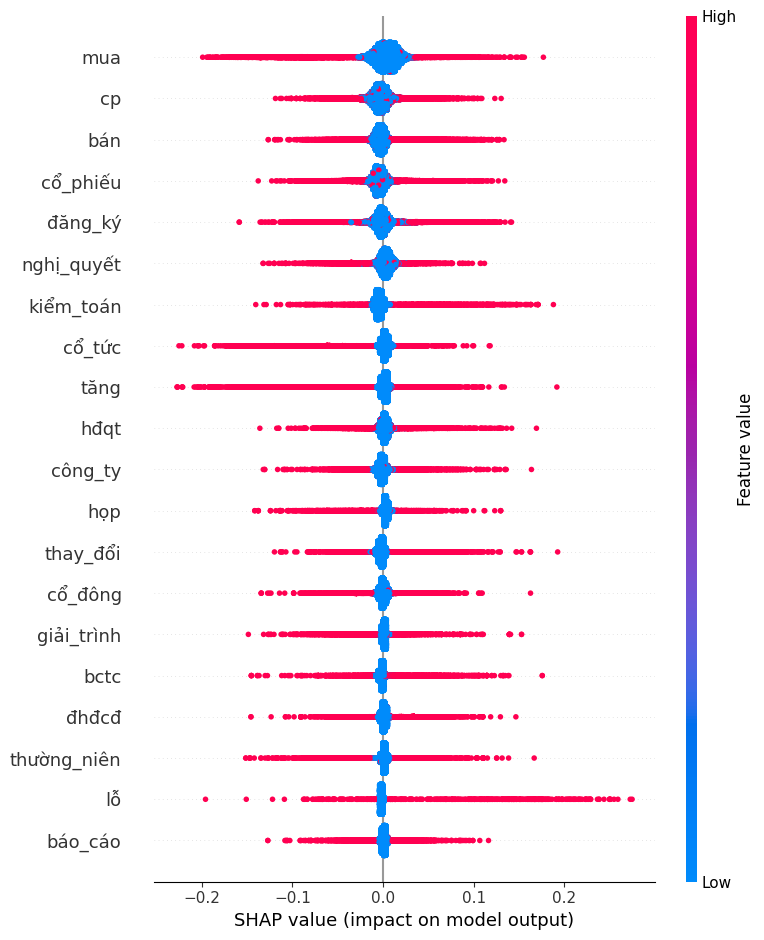

In [12]:
shap.summary_plot(shap_values.values, features=X_test)

In [38]:
impact = X_test*shap_values
impact = impact.replace(0, np.nan)
impact

bctc  biên_bản  biến_động  bks      bán  bán_niên   báo_cáo  \
0       NaN       NaN        NaN  NaN      NaN       NaN       NaN   
1       NaN       NaN        NaN  NaN      NaN       NaN       NaN   
2       NaN       NaN        NaN  NaN      NaN       NaN       NaN   
3       NaN       NaN        NaN  NaN      NaN       NaN       NaN   
4       NaN       NaN        NaN  NaN      NaN       NaN       NaN   
...     ...       ...        ...  ...      ...       ...       ...   
28260   NaN       NaN        NaN  NaN  0.05034       NaN       NaN   
28261   NaN       NaN        NaN  NaN      NaN       NaN       NaN   
28262   NaN       NaN        NaN  NaN      NaN       NaN       NaN   
28263   NaN       NaN        NaN  NaN      NaN       NaN       NaN   
28264   NaN       NaN        NaN  NaN      NaN       NaN -0.032857   

       bất_thường  bị  bổ_nhiệm  ...  S12  S96  SAB  SCO  SD5  SPP       TOP  \
0             NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
1             NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
2             NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
3             NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
4             NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
...           ...  ..       ...  ...  ...  ...  ...  ...  ...  ...       ...   
28260         NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.120302   
28261         NaN NaN -0.000851  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
28262         NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
28263         NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
28264         NaN NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN       NaN   

       V11  VNI  VST  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2      NaN  NaN  NaN  
3      NaN  NaN  NaN  
4      NaN  NaN  NaN  
...    ...  ...  ...  
28260  NaN  NaN  NaN  
28261  NaN  NaN  NaN  
28262  NaN  NaN  NaN  
28263  NaN  NaN  NaN  
28264  NaN  NaN  NaN  

[28265 rows x 337 columns]

In [43]:
shap_values.mean().sort_values().to_csv('data/impact.csv', index=False)